Time: 2020/07/16 ~ 2020/07/17 

Presenter: Allen Shiah

# Data science process

<img src="https://i.pinimg.com/originals/2d/e5/65/2de565d27efb2ab85b6494af12e6096e.jpg" width="600">

# Step1: Case Goal:

>Predict if banking customer would subscribe to bank by building machine learning model on their data. 

>Throughout the course, we're gonna teach you 
1. How to import the data, preprocess the data. 
2. Explore and clean the data.
3. Finally, how to train the data by using some of the most well-known machine learning algorithms.

# Required packages

In [ ]:
# Basic modules
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine learning algorithms
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Imbalanced Data
import imblearn  # It should be installed it explicitly
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## Scikit learn 
> Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use. For most of the data science projects, it is competent enough to reach the industry standard.
[Intro to Scikit learn](https://scikit-learn.org/stable/index.html)

# Step2: Get Data


## Import Data

In [ ]:
# Use google.colab to upload files from local
from google.colab import files

uploaded = files.upload()

Saving subscribe.csv to subscribe (1).csv


In [ ]:
# Pandas is a useful package for data analysis
# It can be used for storing data and data pre-processing
# Its data structure is DataFrame
import pandas as pd
import numpy as np

# io is input/output module
import io

df = pd.read_csv(io.BytesIO(uploaded['subscribe.csv']))
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data type
### Numerical
1. Discrete (categorical)
2. Continuous (numerical)

### Categorical
3. Nominal 
4. Ordinal 

[Intro](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee)

In [ ]:
# Use count() to check data shape
print(df.count())

# Print out the number of variables
print("\n總共有 %s 個變數" %(len(df.count())))
print("總共有 %s 個觀察值" %(len(df)))

age               41188
job               40858
marital           41108
education         39457
default           32591
housing           40198
loan              40198
contact           41188
month             41188
day_of_week       41188
duration          41184
campaign          41188
pdays              1515
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
Subscribe         41188
dtype: int64

總共有 21 個變數
總共有 41188 個觀察值


## Input variables
### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur','housemaid', 'management', 'retired', 'self-employed', 'services', 'student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# DataFrame.dtypes can check data type of each variable
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
Subscribe          object
dtype: object

In [ ]:
# You may use describe() to get descriptive statistics of each variable
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41184.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.310096,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279344,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Step3: Data pre-processing

## Missing Value

### Let's take a look at NaN
1. What is NaN? → missing value
2. Why don't we want them?

In [ ]:
# Which variable has missing value
# 8 variables have missing value
print(df.count()==len(df))

age                True
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact            True
month              True
day_of_week        True
duration          False
campaign           True
pdays             False
previous           True
poutcome           True
emp_var_rate       True
cons_price_idx     True
cons_conf_idx      True
euribor3m          True
nr_employed        True
Subscribe          True
dtype: bool


In [ ]:
df_pre = df
df_pre[["job", "marital", "education", "default", "housing", "loan", "duration", "pdays"]].head(50)

,job,marital,education,default,housing,loan,duration,pdays
0,housemaid,married,basic.4y,no,no,no,261.0,NaN
1,services,married,high.school,NaN,no,no,149.0,NaN
2,services,married,high.school,no,yes,no,226.0,NaN
3,admin.,married,basic.6y,no,no,no,151.0,NaN
4,services,married,high.school,no,no,yes,307.0,NaN
5,services,married,basic.9y,NaN,no,no,198.0,NaN
6,admin.,married,professional.course,no,no,no,139.0,NaN
7,blue-collar,married,NaN,NaN,no,no,217.0,NaN
8,technician,single,professional.course,no,yes,no,380.0,NaN
9,services,single,high.school,no,yes,no,50.0,NaN


### Dealing with NaN (missing value)
1. Drop it (not recommended)
2. Fill in (mean / median / mode) value
3. Fill in ANYTHING

In [ ]:
# Define which categorical column transform from "NaN" to "unknown"
values = {"job": "unknown", "marital": "unknown", "education": "unknown", "default": "unknown", "housing": "unknown", "loan": "unknown"}

# Change NaN to unknown
df_pre.fillna(value=values, inplace=True)

# Check the result
df_pre.count()


age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41184
campaign          41188
pdays              1515
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
Subscribe         41188
dtype: int64

In [ ]:
# Impute "duration" with median
df_pre["duration"].fillna(df_pre["duration"].median(), inplace=True)

# Check the result
df_pre.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays              1515
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
Subscribe         41188
dtype: int64

In [ ]:
# pdays has too many missing values (1515:41188)
# We have to delete this variable
df_pre = df_pre.drop(columns=["pdays"])

# Checke the result
df_pre.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
Subscribe         41188
dtype: int64

In [ ]:
# Compare before and after
print("Before deleting 'pdays': ", df.shape)
print("After deleting 'pdays': ", df_pre.shape)
# You will see that there is one variable being deleted

Before deleting 'pdays':  (41188, 21)
After deleting 'pdays':  (41188, 20)


##Dealinig with duplicate data

In [ ]:
# first, check is there any duplicate in the dataset?
df_duplicate = df_pre[df_pre.duplicated(keep="last")]
print(df_duplicate)

# also, you may use this line
print(df_duplicate.shape)

       age          job   marital  ... euribor3m nr_employed Subscribe
1265    39  blue-collar   married  ...     4.855      5191.0        no
12260   36      retired   married  ...     4.966      5228.1        no
14155   27   technician    single  ...     4.962      5228.1        no
16819   47   technician  divorced  ...     4.962      5228.1        no
18464   32   technician    single  ...     4.968      5228.1        no
20072   55     services   married  ...     4.965      5228.1        no
20531   41   technician   married  ...     4.966      5228.1        no
25183   39       admin.   married  ...     4.153      5195.8        no
28476   24     services    single  ...     1.423      5099.1        no
32505   35       admin.   married  ...     1.313      5099.1        no
36950   45       admin.   married  ...     1.072      5076.2       yes
38255   71      retired    single  ...     0.742      5017.5        no

[12 rows x 20 columns]
(12, 20)


In [ ]:
# Use this code to remove duplicates
df_pre = df_pre.drop_duplicates()

In [ ]:
# Final Comparison
# One variable has been deleted (pdays)
# 12 duplicates have been dropped 
print("Before data-preprocessing: ", df.shape)
print("After data-preprocessing: ", df_pre.shape)

Before data-preprocessing:  (41188, 21)
After data-preprocessing:  (41176, 20)


- We have 12 rows which are duplicates. We will remove these duplicate rows before proceeding furthur.

## Feature Analysis


- Investigate the relationship between features and target variable.
- To see which feature is able to help us separate target variable.



###Separate numerical columns and categorical columns

In [ ]:
# Define numerical columns' name
col_num = ["age", "duration", "campaign", "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed"]

# Define categorical columns' name
col_cat = df_pre.columns.difference(col_num) 
col_cat

Index(['Subscribe', 'contact', 'day_of_week', 'default', 'education',
       'housing', 'job', 'loan', 'marital', 'month', 'poutcome', 'previous'],
      dtype='object')

### Feature analysis for numerical features

In [ ]:
list(enumerate(col_num))

[(0, 'age'),
 (1, 'duration'),
 (2, 'campaign'),
 (3, 'emp_var_rate'),
 (4, 'cons_price_idx'),
 (5, 'cons_conf_idx'),
 (6, 'euribor3m'),
 (7, 'nr_employed')]

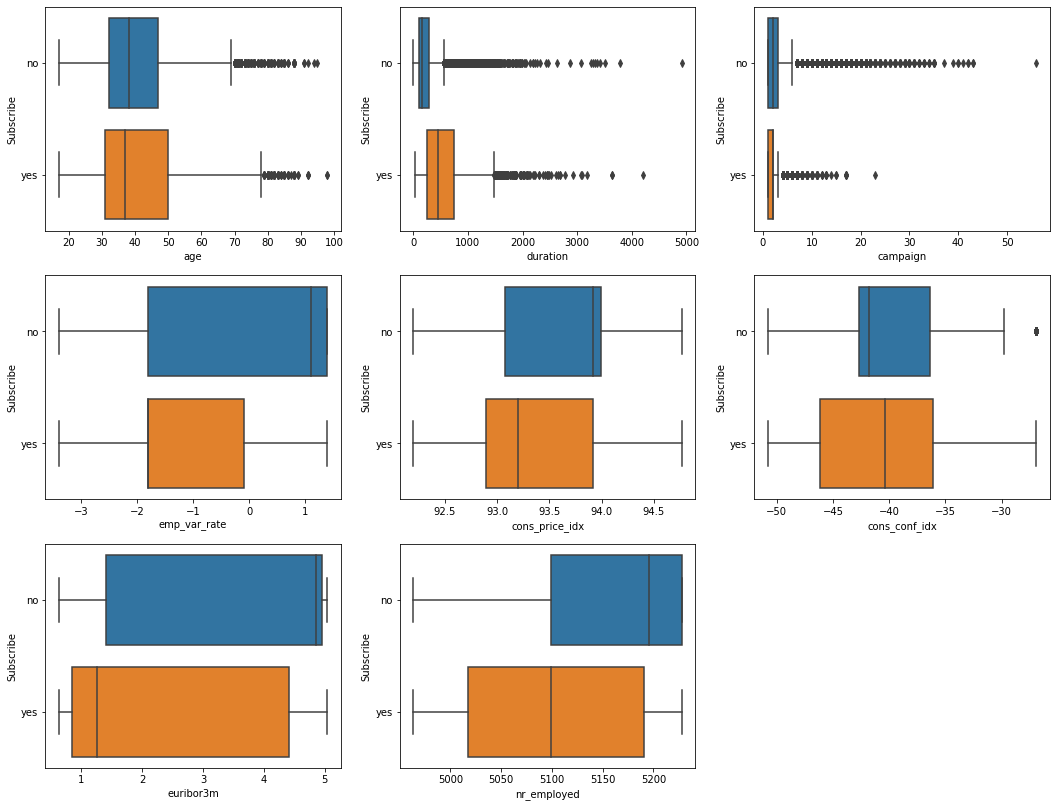

In [ ]:
# Import data visulization packges
# Matplotlib & Seaborn are the most popular data visualization packages in Python
from matplotlib import pyplot as plt
import seaborn as sns

# Plot boxplots correlating "numerical features" with "target variable"
fig = plt.figure(figsize=(18, 14))

for inx, val in enumerate(col_num):
    fig.add_subplot(3, 3, inx+1)
    sns.boxplot(x=val, y=df_pre["Subscribe"], data=df_pre)

In [ ]:
# Record numerical features that are bad at telling if a customer would subscribe.
col_drop = ["age", "campaign", "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m"]

### Feature analysis for categorical features

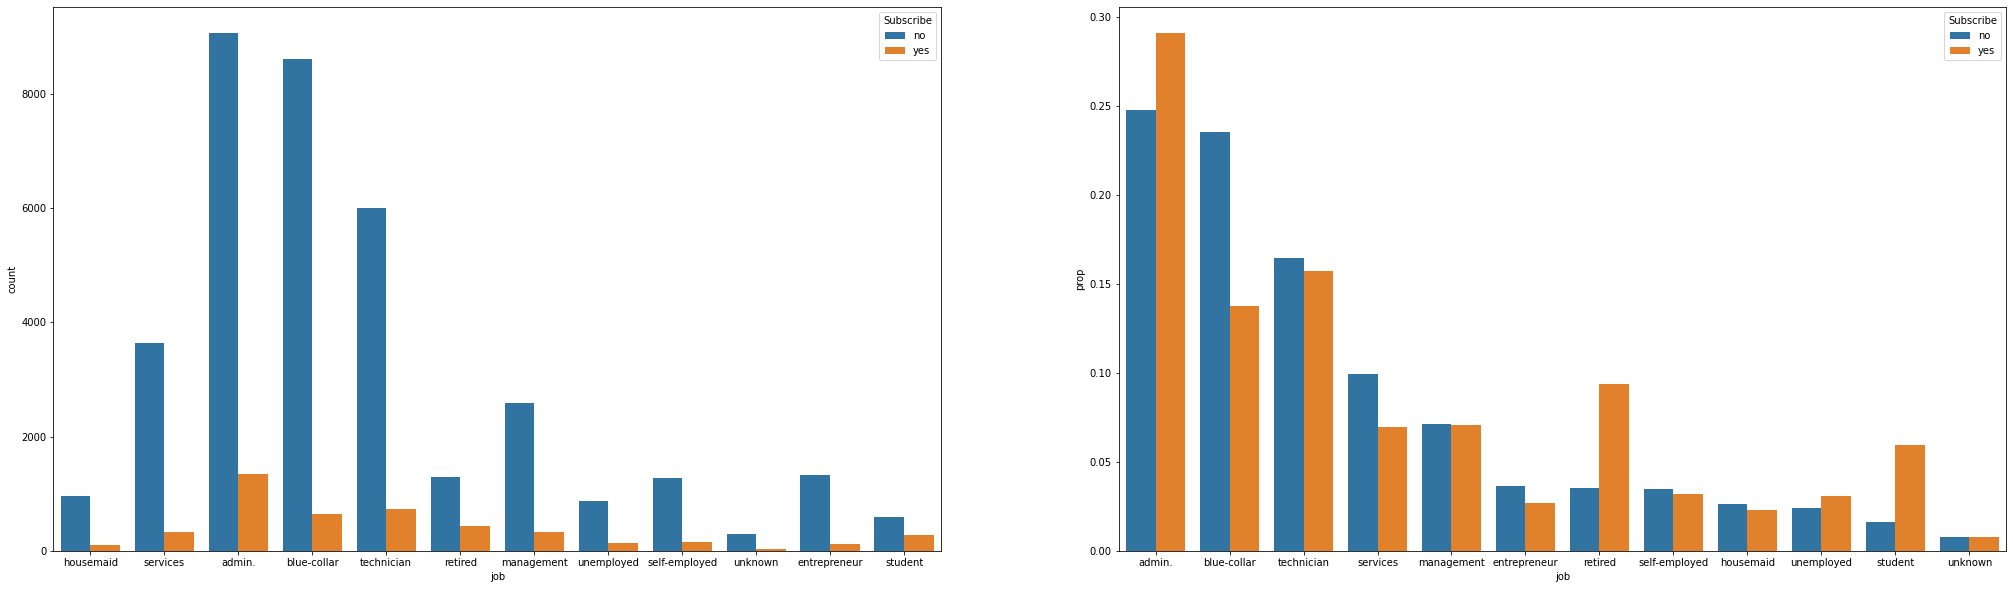

In [ ]:
# Plot percentage plot with two categorical varibales
x, y, hue = "job", "prop", "Subscribe"

f, axes = plt.subplots(1, 2, figsize=(35, 10))

sns.countplot(x=x, hue=hue, data=df_pre, ax=axes[0])

prop_df = (df_pre[x].groupby(df_pre["Subscribe"]).value_counts(normalize=True).rename(y).reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df,ax=axes[1])



In [ ]:
def plot_cat(x):
    '''Plot percentage plot with two categorical varibales'''
    
    x, y, hue = x, "prop", "Subscribe"

    prop_df = (df_pre[x]
                .groupby(df[hue])
                .value_counts(normalize=True)
                .rename(y)
                .reset_index())

    sns.barplot(x=x, y=y, hue=hue, data=prop_df)

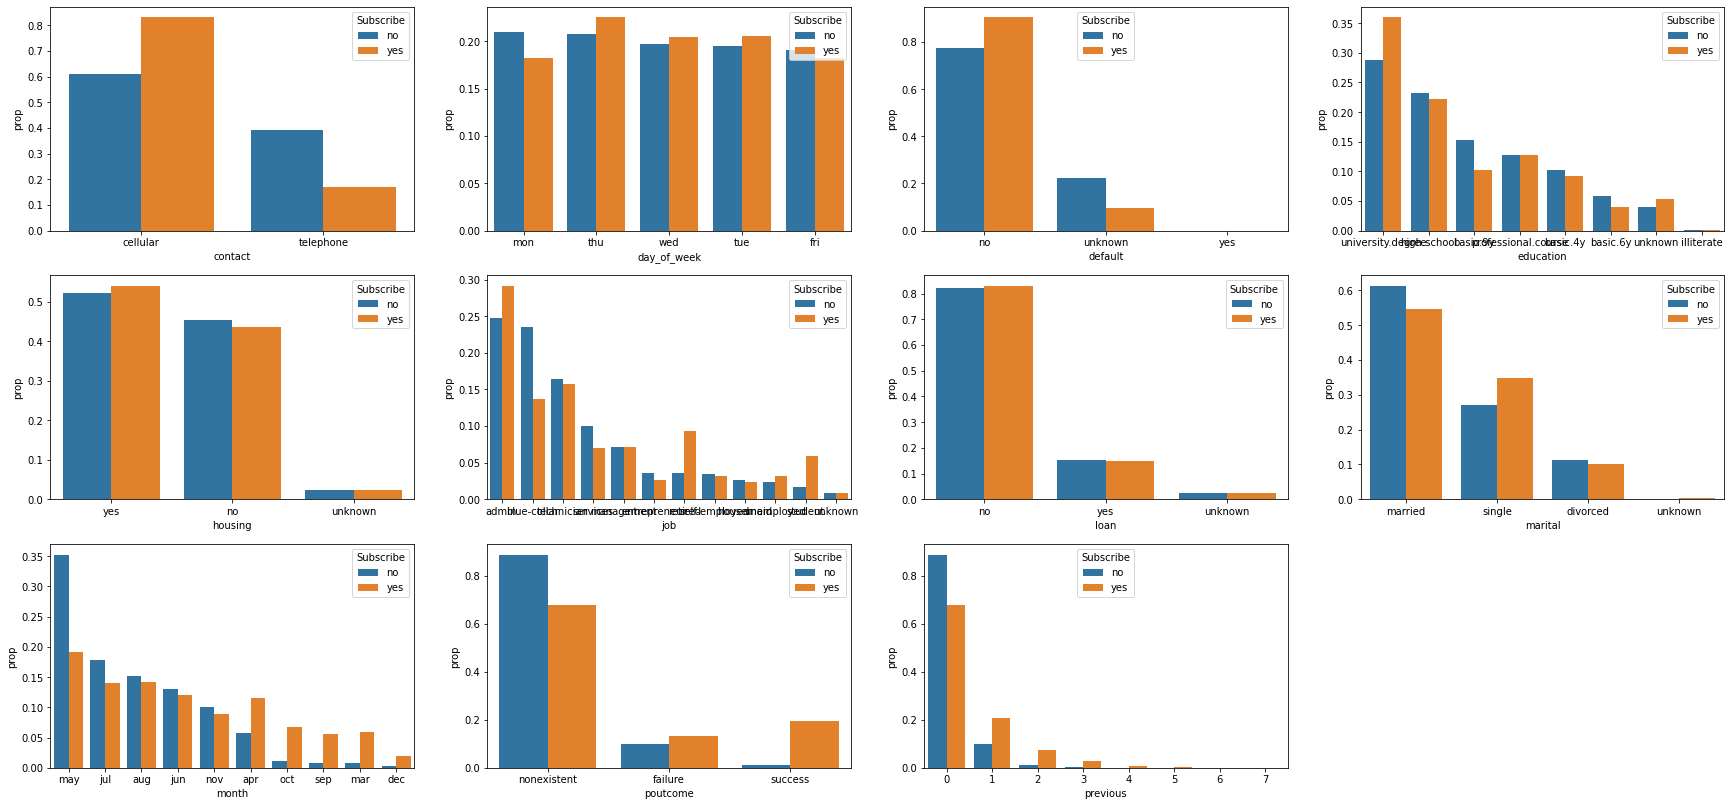

In [ ]:
# Plot barplots correlating "categorical features" with "target variable"
fig = plt.figure(figsize=(30, 14))

for inx, val in enumerate(col_cat.difference(["Subscribe"])):
    fig.add_subplot(3, 4, inx + 1)
    plot_cat(val)

In [ ]:
# Record categorical features that are bad at telling if a customer would subscribe.
col_drop.extend(["day_of_week", "education", "housing", "loan"])

### Correlation between numerical features

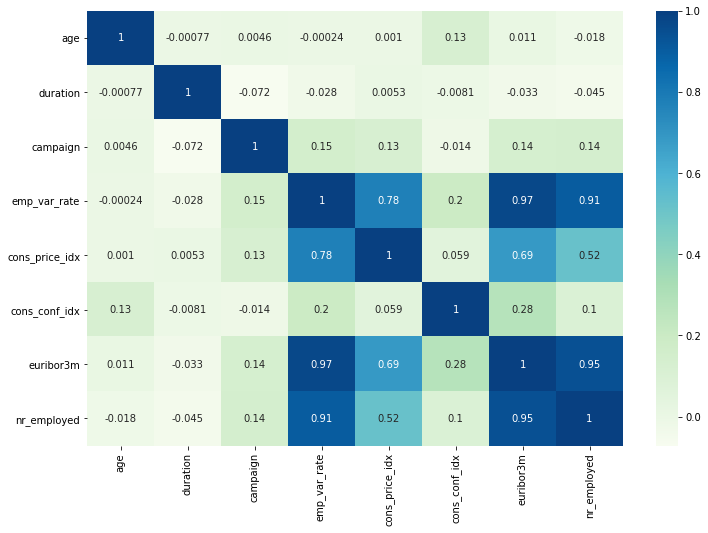

In [ ]:
# We may use correlation matrix to find out highly correlated variables.
# "Heatmap" is function in sns. It help us create beautiful correlation matrix
plt.figure(figsize=(12, 8))
cor = df_pre[col_num].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

In [ ]:
# Show the variables which are bad for building models.
# We will remove them later.
print("Variables we don't need: ", col_drop)
print('There are %s unnecessary variables' %(len(col_drop)))

Variables we don't need:  ['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'day_of_week', 'education', 'housing', 'loan']
There are 10 unnecessary variables


## Standardizing/normalizaing data

- Improve the convergence speed of the model
- Improve the accuracy of the model
- Some machine learnign problem may encounter "scaling problem"




In [ ]:
# Show numerical variables
print(df_pre[col_num].head())
print(df_pre.shape)

   age  duration  campaign  ...  cons_conf_idx  euribor3m  nr_employed
0   56     261.0         1  ...          -36.4      4.857       5191.0
1   57     149.0         1  ...          -36.4      4.857       5191.0
2   37     226.0         1  ...          -36.4      4.857       5191.0
3   40     151.0         1  ...          -36.4      4.857       5191.0
4   56     307.0         1  ...          -36.4      4.857       5191.0

[5 rows x 8 columns]
(41176, 20)


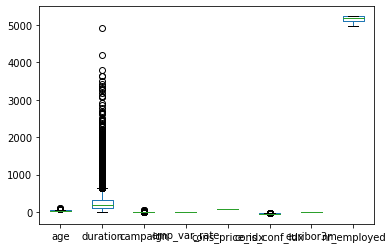

In [ ]:
# Draw a boxplot to see range of each variable
df_pre[col_num].plot.box()

In [ ]:
# Import MinMaxScaler packages to perform standardization
from sklearn.preprocessing import MinMaxScaler

# Use "MinMaxScaler()" to standardize numerical data
df_pre[col_num] = MinMaxScaler().fit_transform(df_pre[col_num])
df_pre.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Subscribe
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.052878,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,0.030100,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,0.045760,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.030506,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,0.062233,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no


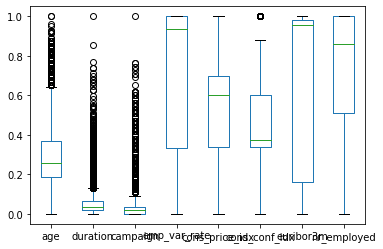

In [ ]:
# Show the result
# You may compare this to the non-standardizing data
df_pre[col_num].plot.box()

## Converting categorical features

- Convert categorical columns to numerical so that ML models can understand
- For this part, we are just practicing LabelEncoder & OneHotEncoder. We are not converting 'df_pre' yet. 


In [ ]:
# Before conversion
# Assign df_pre to labelencoder
# Assign df_pre to onehotencoder
df_labelencoder = df_pre
df_onehotencoder = df_pre
df_pre.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Subscribe
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.052878,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,0.030100,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,0.045760,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.030506,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,0.062233,0.0,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no


### LabelEncoder (Practice)
- Convert text data to number

In [ ]:
# Import LabelEncoder to convert categoricla data
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to convert categorical variables to numerical ones
df_labelencoder[col_cat] = df_labelencoder[col_cat].apply(LabelEncoder().fit_transform)
df_labelencoder.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Subscribe
0,0.481481,3,1,0,0,0,0,1,6,1,0.052878,0.0,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,1,0,0,1,6,1,0.030100,0.0,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,2,0,1,6,1,0.045760,0.0,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,1,6,1,0.030506,0.0,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,2,1,6,1,0.062233,0.0,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0


### OneHotEncoder (Practice)
- Convert number to sparse matrix representation

In [ ]:
# Check how many unique items in housing
print(df_pre['housing'].unique())

[0 2 1]


In [ ]:
# Import OneHotEncoder to convert categorical data
from sklearn.preprocessing import OneHotEncoder

# Initialize a OneHotEncoder
ohe = OneHotEncoder(categories="auto")

# Convert "education" to sparse array
sarr_edu = ohe.fit_transform(df_pre[["housing"]]).toarray()

# One hot features
edu_features = pd.DataFrame(sarr_edu)
edu_features.head()

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
df_pre

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Subscribe
0,0.481481,3,1,0,0,0,0,1,6,1,0.052878,0.000000,0,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,1,0,0,1,6,1,0.030100,0.000000,0,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,2,0,1,6,1,0.045760,0.000000,0,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,1,6,1,0.030506,0.000000,0,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,2,1,6,1,0.062233,0.000000,0,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,5,1,5,0,2,0,0,7,0,0.067724,0.000000,0,1,0.479167,1.000000,0.00000,0.089322,0.000000,1
41184,0.358025,1,1,5,0,0,0,0,7,0,0.077690,0.000000,0,1,0.479167,1.000000,0.00000,0.089322,0.000000,0
41185,0.481481,5,1,6,0,2,0,0,7,0,0.038235,0.018182,0,1,0.479167,1.000000,0.00000,0.089322,0.000000,0
41186,0.333333,9,1,5,0,0,0,0,7,0,0.089689,0.000000,0,1,0.479167,1.000000,0.00000,0.089322,0.000000,1


### Differentiate feature & target variable
- Separate inpedendent and target variables

In [ ]:
print(df_pre)

            age  job  marital  ...  euribor3m  nr_employed  Subscribe
0      0.481481    3        1  ...   0.957379     0.859735          0
1      0.493827    7        1  ...   0.957379     0.859735          0
2      0.246914    7        1  ...   0.957379     0.859735          0
3      0.283951    0        1  ...   0.957379     0.859735          0
4      0.481481    7        1  ...   0.957379     0.859735          0
...         ...  ...      ...  ...        ...          ...        ...
41183  0.691358    5        1  ...   0.089322     0.000000          1
41184  0.358025    1        1  ...   0.089322     0.000000          0
41185  0.481481    5        1  ...   0.089322     0.000000          0
41186  0.333333    9        1  ...   0.089322     0.000000          1
41187  0.703704    5        1  ...   0.089322     0.000000          0

[41176 rows x 20 columns]


In [ ]:
# Show the variables you want to drop
print(col_drop)
print('總共要刪除 %s 個變數' %(len(col_drop)))

['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'day_of_week', 'education', 'housing', 'loan']
總共要刪除 10 個變數


In [ ]:
# Beroe dropping
print("Before dropping: ", df_pre.shape)

# First, let's drop the unnecessary columns.
df_pre = df_pre.drop(columns=col_drop)

# Check the result to see if the number of the remaining variables are 10.
print("After dropping: ", df_pre.shape)
print("Remaning variables:", df_pre.columns)

Before dropping:  (41176, 20)
After dropping:  (41176, 10)
Remaning variables: Index(['job', 'marital', 'default', 'contact', 'month', 'duration', 'previous',
       'poutcome', 'nr_employed', 'Subscribe'],
      dtype='object')


Take IRIS data for example
We want to seperate "target" with "features"

x
- sepal length
- sepal width
- petal length
- petal width

y
- target

<img src="https://cdn-images-1.medium.com/max/1600/1*Qt_pYlwBeHtTewnEdksYKQ.png" width="600">

- [資料來源](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) 

In [ ]:
# Separate "features" and "target variable"
# This is feature matrix
X = df_pre.loc[:, df_pre.columns != "Subscribe"]

# This is target variable
y = df_pre["Subscribe"]

In [ ]:
# Check the result of X (feature matrix)
print(X)

       job  marital  default  ...  previous  poutcome  nr_employed
0        3        1        0  ...         0         1     0.859735
1        7        1        1  ...         0         1     0.859735
2        7        1        0  ...         0         1     0.859735
3        0        1        0  ...         0         1     0.859735
4        7        1        0  ...         0         1     0.859735
...    ...      ...      ...  ...       ...       ...          ...
41183    5        1        0  ...         0         1     0.000000
41184    1        1        0  ...         0         1     0.000000
41185    5        1        0  ...         0         1     0.000000
41186    9        1        0  ...         0         1     0.000000
41187    5        1        0  ...         1         0     0.000000

[41176 rows x 9 columns]


In [ ]:
# Check the result of y (target variable)
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Subscribe, Length: 41176, dtype: int64


### Dummy encoder

In [ ]:
# These are the remaning categorical variables
col_cat = ["job", "marital", "default", "contact", "month", "previous", "poutcome"]

# We may use "pd.get_dummies()" to convert categorical variables. (This is easier)
# Convert categorical columns to onehot columns
X = pd.get_dummies(X, columns=col_cat, drop_first=True) # drop_first should set to True
X.head()

,duration,nr_employed,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,default_1,default_2,contact_1,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,poutcome_1,poutcome_2
0,0.052878,0.859735,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.030100,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0.045760,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.030506,0.859735,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.062233,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Check the shape of X after converting. 
print(X.shape)
print(y.shape)

(41176, 37)
(41176,)


In [ ]:
# Compare with previous result
df_pre.shape
print(df_pre)
print(df_pre.columns)

       job  marital  default  ...  poutcome  nr_employed  Subscribe
0        3        1        0  ...         1     0.859735          0
1        7        1        1  ...         1     0.859735          0
2        7        1        0  ...         1     0.859735          0
3        0        1        0  ...         1     0.859735          0
4        7        1        0  ...         1     0.859735          0
...    ...      ...      ...  ...       ...          ...        ...
41183    5        1        0  ...         1     0.000000          1
41184    1        1        0  ...         1     0.000000          0
41185    5        1        0  ...         1     0.000000          0
41186    9        1        0  ...         1     0.000000          1
41187    5        1        0  ...         0     0.000000          0

[41176 rows x 10 columns]
Index(['job', 'marital', 'default', 'contact', 'month', 'duration', 'previous',
       'poutcome', 'nr_employed', 'Subscribe'],
      dtype='object')


## Spliting dataset

### Training dataset/testing dataset

<img src="https://cdn-images-1.medium.com/max/1000/1*4G__SV580CxFj78o9yUXuQ.png" width="600">

- [Source](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)     
- [Further reading](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

In [ ]:
# Import the package from sklearn for spliting dataset
from sklearn.model_selection import train_test_split

# You may split the dataset into any portion you want
# "test_size" is the "portion parameter" you can use
# Now, we just split them into 70%(traning) 30%(testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Check the result
len(X_train), len(X_test), len(y_train), len(y_test)

(28823, 12353, 28823, 12353)

# Step 4: Training model

In [ ]:
# Import model evaluation packages
# We will provide 4 commonly used model evaluation methods
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# First, let's program a function that will help us simplify the traning process.
# We just need to pass traning dataset and pre-initiated machine learning model to the function, and it wll do the rest.

def evaluate(clf, X_train, y_train):
    # With this line, your ML model will fit the traning dataset automatically.
    # However, it's much better to understand the theory behind it before using any ML model.
    clf.fit(X_train, y_train)

    # Print the algorithm you use and the traning result.
    # We compare the result from the model to traning dataset.
    print(f"Algorithm: {clf}" + "\n")
    print(f"Accuracy is: {round(clf.score(X_test, y_test), 2)}")
    
    # This line will help you get prediction value of target variable.
    y_pred = clf.predict(X_test)

    # Use the model evaluation tools from Sklearn
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    
    # Print out the result
    print(f"Precision is: {precision}")
    print(f"Recall is: {recall}")
    print(f"f1 is: {f1}")
    
    # Pass the reslut
    return np.array([[accuracy, precision, recall, f1]])

## SVC - Support Vector Machine

<img src="http://www.statsoft.com/textbook/graphics/SVMIntro3.gif">

Pros: 
1. It is effective in high dimensional spaces.
2. It works really well with clear margin of separation.

Cons: 
1. It requires too much memory when we have large dataset.
2. It also doesn’t perform very well, when the data set are overlapping.

In [ ]:
# Declare an empty array to store the model evaluation result
arr_eval = np.array([])

# Import SVC from sklearn
from sklearn.svm import LinearSVC

# Initiate LinearSVC() object
svc = LinearSVC()


# Start the function and store the result to "arr_eval"
arr_eval = evaluate(svc, X_train, y_train)
arr_eval

Algorithm: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy is: 0.91
Precision is: 0.68
Recall is: 0.36
f1 is: 0.47


array([[0.91, 0.68, 0.36, 0.47]])

## kNN - k nearest neighbor

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=450>

Pros:
1. kNN is a non-parametric algorithm which means there are assumptions to be met to implement kNN.
2. kNN algorithm is very simple to understand and equally easy to implement.

Cons:
1. kNN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.
2. KNN works well with small number of input variables but as the numbers of variables grow kNN algorithm struggles to predict the output of new data point.

In [ ]:
# Import KNN from Sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initiate KNeighborsClassifier() object
knn = KNeighborsClassifier()

# Start the function and store the result to "arr_eval"
arr_eval = np.append(arr_eval, evaluate(knn, X_train, y_train), axis=0)
arr_eval

Algorithm: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy is: 0.9
Precision is: 0.57
Recall is: 0.43
f1 is: 0.49


array([[0.91, 0.68, 0.36, 0.47],
       [0.9 , 0.57, 0.43, 0.49]])

## Decision tree 

<img src="http://dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png" width=450>

Pros:
1. Decision trees are relatively easy to understand when there are few decisions and outcomes included in the tree.

Cons:
1. Large trees that include dozens of decision nodes (spots where new decisions are made) can be convoluted and may have limited value.
2. It's relatively easy to be overfitting!!!

In [ ]:
# Import Decision tree from Sklearn
from sklearn.tree import DecisionTreeClassifier

# Initiate DecisionTreeClassifier() object
dtc = DecisionTreeClassifier()

# Start the function and store the result to "arr_eval"
arr_eval = np.append(arr_eval, evaluate(dtc, X_train, y_train), axis=0)
arr_eval

Algorithm: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy is: 0.89
Precision is: 0.49
Recall is: 0.5
f1 is: 0.5


array([[0.91, 0.68, 0.36, 0.47],
       [0.9 , 0.57, 0.43, 0.49],
       [0.89, 0.49, 0.5 , 0.5 ]])

## Model evaluation
What the hell is Precision/Recall/f1-score?

<img src="http://kflu.github.io/2016/08/26/2016-08-26-visualizing-precision-recall/2016-08-26-visualizing-precision-recall-1.png" width=600>

[資料來源](http://kflu.github.io/2016/08/26/2016-08-26-visualizing-precision-recall/)

> Precision = TP / (TP + FP)  
> Recall = TP / (TP + FN)  
> f1 = (2 * P * R) / (P + R)  

## Summary of model performance

In [ ]:
from sklearn.metrics import confusion_matrix

svc = LinearSVC().fit(X_train, y_train)
svc_pre = svc.predict(X_test)

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_pre = knn.predict(X_test)

dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc_pre = dtc.predict(X_test)

print("SVC confusion matrix: \n", confusion_matrix(y_test, svc_pre))
print("KNN confusion matrix: \n", confusion_matrix(y_test, knn_pre))
print("DTC confusion matrix: \n", confusion_matrix(y_test, dtc_pre))

SVC confusion matrix: 
 [[10770   233]
 [  860   490]]
KNN confusion matrix: 
 [[10557   446]
 [  766   584]]
DTC confusion matrix: 
 [[10277   726]
 [  667   683]]


In [ ]:
# Store the model evaluation into DataFrame
df_eval = pd.DataFrame(arr_eval, columns=["accuracy", "precision", "recall", "f1"])
df_eval["model"] = ['SVC', 'KNN', 'DTC']
df_eval["parameter"] = [svc, knn, dtc]
df_eval

,accuracy,precision,recall,f1,model,parameter
0,0.91,0.68,0.36,0.47,SVC,"LinearSVC(C=1.0, class_weight=None, dual=True,..."
1,0.90,0.57,0.43,0.49,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,0.89,0.49,0.50,0.50,DTC,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


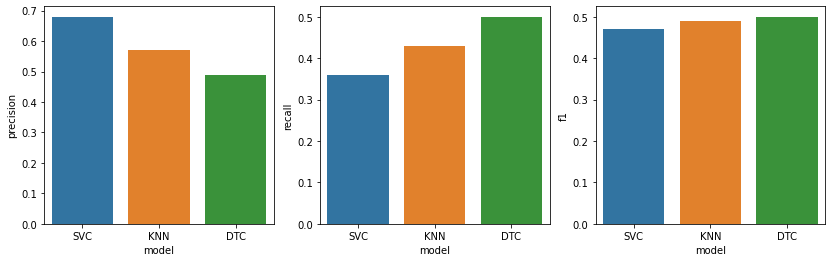

In [ ]:
# Compare the the result between each ML model
f, axes = plt.subplots(1, 3, sharex=True, figsize=(14, 4))
sns.barplot(x="model", y="precision", data=df_eval, ax=axes[0])
sns.barplot(x="model", y="recall", data=df_eval, ax=axes[1])
sns.barplot(x="model", y="f1", data=df_eval, ax=axes[2])

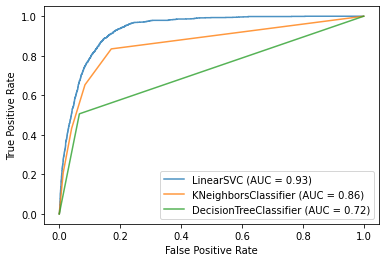

In [ ]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
svc_disp = plot_roc_curve(svc, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
dtc_disp = plot_roc_curve(dtc, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

# Step 5: Why model performance is not good?

Mostly, it's imbalanced data that cause this problem. So, how to overcome it?

## Take a glimpse on the imbalanced data

No sub: 36537
Sub: 4639
Proportion: 7.88 : 1


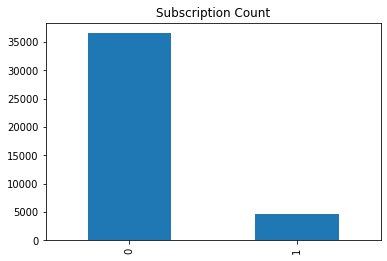

In [ ]:
# Check the difference between "Yes" and "No" in target variable
# See how big the gap is
sub_count = df_pre["Subscribe"].value_counts()
print('No sub:', sub_count[0])
print('Sub:', sub_count[1])
print('Proportion:', round(sub_count[0] / sub_count[1], 2), ': 1')

# Use ggplot package to draw a bar plot
sub_count.plot.bar(title='Subscription Count');

In [ ]:
# Imbalance of traning dataset
y_train.value_counts()

0    25534
1     3289
Name: Subscribe, dtype: int64

## Common pratices to conquer imbalanced data
1. Oversampling
2. Undersampling
3. **SMOTE**
4. **Class weight**
5. Boosting/Bagging

> Further reading  
https://imbalanced-learn.readthedocs.io/en/stable/install.html  
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

## Why choose Oversampling?

We don't have enough data samples ><  
Caution:  
**Do not resample the testing dataset!!!**

## SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
!pip install imblearn

In [ ]:
# To deal with imbalanced dataset, we may use the package "imblearn"
# Over-sampling Technique will help you balance the dataset.
import imblearn  # It should be installed it explicitly
from imblearn.over_sampling import SMOTE

# Initiate SMOTE object
smote = SMOTE(ratio='minority')

# Start over-sampling
X_smote, y_smote = smote.fit_sample(X_train, y_train)

# Check the result
print(X_smote.shape[0] - X_train.shape[0], 'new random picked points')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


22245 new random picked points


In [ ]:
# Make sure the number of two kinds of customers are equal
unique, counts = np.unique(y_smote, return_counts=True)
print(counts)  

[25534 25534]


##  Retraining model

In [ ]:
# Retrain the model with balanced dataset

# Declare an empty array to store the results
arr_eval_smote = []

for inx, model in enumerate(df_eval["parameter"]):
    if inx == 0:
        arr_eval_smote = evaluate(model, X_smote, y_smote)
        print('\n'+'*'*30+'\n')
    else:
        arr_eval_smote = np.append(arr_eval_smote, evaluate(model, X_smote, y_smote), axis=0)
        print('\n'+'*'*30+'\n')
        
arr_eval_smote

Algorithm: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy is: 0.86
Precision is: 0.44
Recall is: 0.87
f1 is: 0.58

******************************

Algorithm: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy is: 0.86
Precision is: 0.43
Recall is: 0.74
f1 is: 0.54

******************************

Algorithm: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presor

array([[0.86, 0.44, 0.87, 0.58],
       [0.86, 0.43, 0.74, 0.54],
       [0.87, 0.43, 0.69, 0.53]])

In [ ]:
# Store the result into DataFrame
df_eval_smote = pd.DataFrame(arr_eval_smote, columns=["accuracy", "precision", "recall", "f1"])
df_eval_smote["model"] = [svc, knn, dtc]

print("With over-sampliing")
df_eval_smote

With over-sampliing


,accuracy,precision,recall,f1,model
0,0.86,0.44,0.87,0.58,"LinearSVC(C=1.0, class_weight=None, dual=True,..."
1,0.86,0.43,0.74,0.54,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,0.87,0.43,0.69,0.53,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


In [ ]:
 # Compare over-sampling with previous result
print("Without over-sampling")
df_eval

# You may see that precision drops but recall and f1-score go up significantly.
# According to this result, we may infer that FP(false positive)↑ FN(false negative)↓,
# which means model prediction incline to positive result.

Without over-sampling


,accuracy,precision,recall,f1,model,parameter
0,0.91,0.68,0.36,0.47,SVC,"LinearSVC(C=1.0, class_weight=None, dual=True,..."
1,0.90,0.57,0.43,0.49,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,0.89,0.49,0.50,0.50,DTC,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


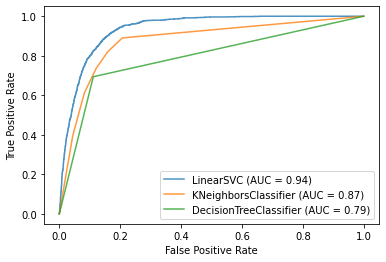

In [ ]:
from sklearn.metrics import plot_roc_curve
svc = LinearSVC().fit(X_smote, y_smote)
knn = KNeighborsClassifier().fit(X_smote, y_smote)
dtc = DecisionTreeClassifier().fit(X_smote, y_smote)

ax = plt.gca()
svc_disp = plot_roc_curve(svc, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
dtc_disp = plot_roc_curve(dtc, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

## Class weighting 

In [ ]:
# Also, we could try "class weighting" to balance the data
svc = LinearSVC(class_weight="balanced")
evaluate(svc, X_train, y_train) 

Algorithm: LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy is: 0.86
Precision is: 0.44
Recall is: 0.87
f1 is: 0.58


array([[0.86, 0.44, 0.87, 0.58]])

# Online learning resources
1. https://vas3k.com/blog/machine_learning/?fbclid=IwAR2sjhMzVOpaTvkw5oKwlipFrtaNul0OPsnVVCbseu7fOns2qC2nUUL0gpg
2. https://developers.google.com/machine-learning/crash-course/

# Q&A
Contact:  
Email: allensha42@gmail.com